In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
import time
import random
from collections import defaultdict




In [2]:
# Load all sheets into a dictionary of DataFrames
sheets_dict = pd.read_excel(r"C:\Users\Malak Elsayed\OneDrive\Desktop\studentcourses.xlsx", sheet_name=None)

# Access a specific sheet by name
sheetScience= sheets_dict['علوم طبية ']
sheetEng= sheets_dict['الهندسة']
sheetAdmin= sheets_dict['العلوم الادارية']
sheetPharma= sheets_dict['صيدلة وطب اسنان']
sheetComp= sheets_dict['حاسب الي']



columns = [
    "م", 
    "رقم الطالب", 
    "اسم الطالب", 
    "التخصص", 
    "رقم المقرر", 
    "اسم المقرر", 
    "رمز المقرر" ,
     "رقم الشعبة"
]

sheetScience.columns= columns
sheetEng.columns= columns
sheetAdmin.columns= columns
sheetPharma.columns= columns
sheetComp.columns= columns




In [3]:
sheetScience = sheetScience.drop(columns='م')
sheetEng= sheetEng.drop(columns='م')
sheetAdmin= sheetAdmin.drop(columns='م')
sheetPharma= sheetPharma.drop(columns='م')
sheetComp = sheetComp.drop(columns='م')


Cleaning and showing total number of students in each uni 

In [4]:
sheetScience = sheetScience.drop_duplicates()
sheetScience = sheetScience.dropna()
studentCountSci = len(sheetScience['رقم الطالب'])
print("total students in Science " , studentCountSci)

sheetEng = sheetEng.drop_duplicates()
sheetEng = sheetEng.dropna()
studentCountEng = len(sheetEng['رقم الطالب'])
print("total students in Engineering " , studentCountEng)


sheetAdmin = sheetAdmin.drop_duplicates()
sheetAdmin = sheetAdmin.dropna()
studentCountAdmin = len(sheetAdmin['رقم الطالب'])
print("total students in Administration " , studentCountAdmin)


sheetPharma = sheetPharma.drop_duplicates()
sheetPharma = sheetPharma.dropna()
studentCountPharma = len(sheetPharma['رقم الطالب'])
print("total students in Pharmacy " , studentCountPharma)



sheetComp = sheetComp.drop_duplicates()
sheetComp = sheetComp.dropna()
studentCountComp = len(sheetComp['رقم الطالب'])
print("total students in Computer science " , studentCountComp)



total students in Science  1262
total students in Engineering  1374
total students in Administration  5133
total students in Pharmacy  2514
total students in Computer science  822


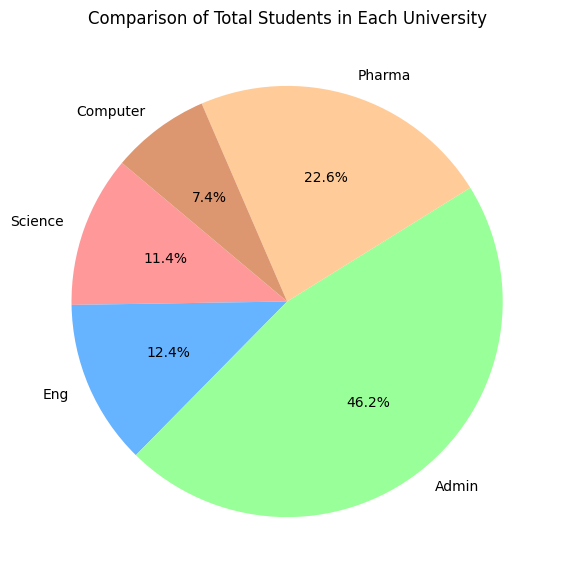

In [5]:


# Example: Dictionary where keys are data frame names, and values are total students count
student_counts = {
    'Science': studentCountSci,
    'Eng': studentCountEng,
    'Admin': studentCountAdmin,
    'Pharma': studentCountPharma,
    'Computer' : studentCountComp
}

# Convert the dictionary into lists for plotting
data_frame_names = list(student_counts.keys())
total_students = list(student_counts.values())

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(total_students, labels=data_frame_names, autopct='%1.1f%%', startangle=140, colors=['#FF9999','#66B3FF','#99FF99','#FFCC99', '#DD9770'])

# Add title
plt.title('Comparison of Total Students in Each University')

# Show plot
plt.show()


Merging all uni's Data

In [6]:
merged_df = pd.concat([sheetScience , sheetEng,sheetAdmin, sheetPharma , sheetComp], ignore_index=True)
merged_df


,رقم الطالب,اسم الطالب,التخصص,رقم المقرر,اسم المقرر,رمز المقرر,رقم الشعبة
0,1105312002,عبدالمجيد علي عبدالرحمن الشاوي,السجلات الطبية-2,110501,المهارات اللغوية,ARAB 101,211637
1,1105311013,سالم سليمان دهش الشمري,السجلات الطبية-2,110501,المهارات اللغوية,ARAB 101,211637
2,1105312004,احمد عبدالله صالح الحربي,السجلات الطبية-2,110511,التحرير العربي,ARAB 102,111647
3,1105321021,يوسف عبدالله سليمان المهوس,السجلات الطبية-2,110511,التحرير العربي,ARAB 102,211647
4,1105312011,سطام بندر جايز المطيري,السجلات الطبية-2,110511,التحرير العربي,ARAB 102,211647
...,...,...,...,...,...,...,...
11100,1501311010,أحمد عبدالعزيز محمد العبيدان,هندسة الحاسب,150147,هندسة البرمجيات,342عال,215153
11101,1401321075,صالح محمد صالح الرميح,علوم الحاسب,150147,هندسة البرمجيات,342عال,115152
11102,1502301005,يزيد محمد صالح الهجرس,علوم حاسب-1,150147,هندسة البرمجيات,342عال,115155
11103,1502312010,محمد عبدالله محيميد العريني,علوم الحاسب,150147,هندسة البرمجيات,342عال,115152


In [7]:
merged_df = merged_df.drop_duplicates()
merged_df

,رقم الطالب,اسم الطالب,التخصص,رقم المقرر,اسم المقرر,رمز المقرر,رقم الشعبة
0,1105312002,عبدالمجيد علي عبدالرحمن الشاوي,السجلات الطبية-2,110501,المهارات اللغوية,ARAB 101,211637
1,1105311013,سالم سليمان دهش الشمري,السجلات الطبية-2,110501,المهارات اللغوية,ARAB 101,211637
2,1105312004,احمد عبدالله صالح الحربي,السجلات الطبية-2,110511,التحرير العربي,ARAB 102,111647
3,1105321021,يوسف عبدالله سليمان المهوس,السجلات الطبية-2,110511,التحرير العربي,ARAB 102,211647
4,1105312011,سطام بندر جايز المطيري,السجلات الطبية-2,110511,التحرير العربي,ARAB 102,211647
...,...,...,...,...,...,...,...
11100,1501311010,أحمد عبدالعزيز محمد العبيدان,هندسة الحاسب,150147,هندسة البرمجيات,342عال,215153
11101,1401321075,صالح محمد صالح الرميح,علوم الحاسب,150147,هندسة البرمجيات,342عال,115152
11102,1502301005,يزيد محمد صالح الهجرس,علوم حاسب-1,150147,هندسة البرمجيات,342عال,115155
11103,1502312010,محمد عبدالله محيميد العريني,علوم الحاسب,150147,هندسة البرمجيات,342عال,115152


Showing how many students per a course

In [8]:
student_count = merged_df['اسم المقرر'].apply(lambda x: get_display(arabic_reshaper.reshape(x))).value_counts()

student_count


اسم المقرر
ﻡﻼﺳﻹﺍ ﻲﻓ ﻱﺩﺎﺼﺘﻗﻹﺍ ﻡﺎﻈﻨﻟﺍ        260
ﻡﻼﺳﻹﺍ ﻲﻓ ﻲﺳﺎﻴﺴﻟﺍ ﻡﺎﻈﻨﻟﺍ ﺲﺳﺃ     210
ﺔﻳﻮﻐﻠﻟﺍ ﺕﺍﺭﺎﻬﻤﻟﺍ                208
ﻲﺑﺮﻌﻟﺍ ﺮﻳﺮﺤﺘﻟﺍ                  189
ﻊﻤﺘﺠﻤﻟﺍ ﺀﺎﻨﺑﻭ ﻡﻼﺳﻹﺍ             125
                               ... 
Health Care Planning              1
ﺐﺳﺎﺤﻟﺍ ﻡﻮﻠﻋ ﻲﻓ ﺓﺭﺎﺘﺨﻣ ﻊﻴﺿﺍﻮﻣ      1
ﻲﻤﻗﺮﻟﺍ ﻢﻜﺤﺘﻠﻟ ﺔﻣﺪﻘﻣ               1
ﺕﺎﻧﺎﻴﺒﻟﺍ ﺪﻋﺍﻮﻗ ﺓﺭﺍﺩﺇ ﻢﻈﻧ          1
Biology                           1
Name: count, Length: 462, dtype: int64

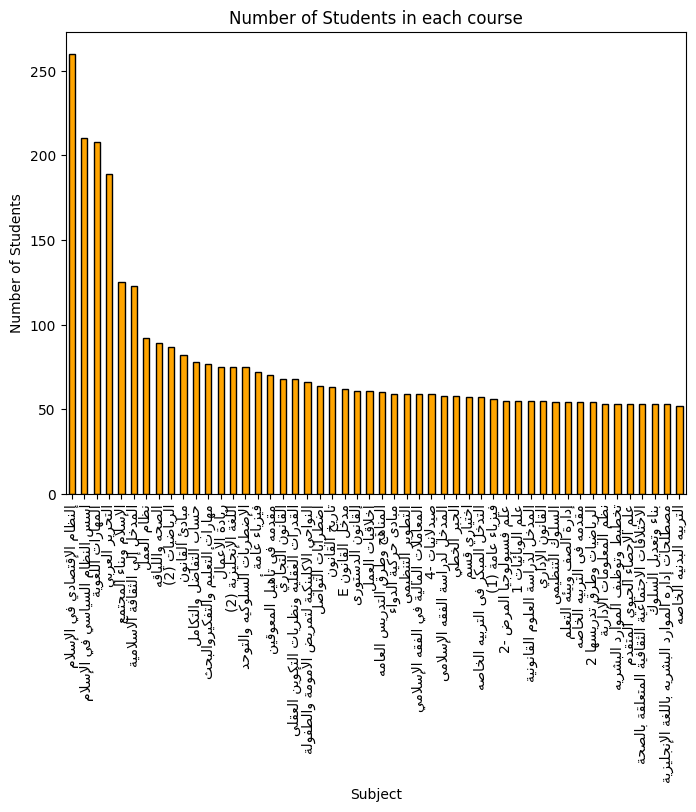

In [9]:
plt.figure(figsize=(8, 6))
student_count.head(50).plot(kind='bar', color='orange', edgecolor='black')
plt.title('Number of Students in each course')
plt.xlabel('Subject')
plt.ylabel('Number of Students')
plt.xticks(rotation=90)
plt.show()

Applying network for Time table scheduling

In [10]:

G = nx.Graph()

# Add nodes and edges based on shared students
for student, student_group in merged_df.groupby('رقم الطالب'):
    courses = student_group['اسم المقرر'].tolist()
    for i in range(len(courses)):
        for j in range(i + 1, len(courses)):
            
            G.add_edge(courses[i], courses[j])


print(G.edges())


num_nodes = G.number_of_nodes()

print("Number of nodes:", num_nodes)


[('المدخل إلى الثقافة الإسلامية', 'المهارات اللغوية'), ('المدخل إلى الثقافة الإسلامية', 'أساليب في التأهيل الطبي'), ('المدخل إلى الثقافة الإسلامية', 'تأهيل المسنين'), ('المدخل إلى الثقافة الإسلامية', 'دراسات إكلينكية 1'), ('المدخل إلى الثقافة الإسلامية', 'علم النفسي التأهيلي'), ('المدخل إلى الثقافة الإسلامية', 'ممارسة إكلينكية 1'), ('المدخل إلى الثقافة الإسلامية', 'أساليب العلاج الطبيعي 3'), ('المدخل إلى الثقافة الإسلامية', 'جراحة العظام والتأهيل التكنولوجي'), ('المدخل إلى الثقافة الإسلامية', 'المجهر الالكتروني'), ('المدخل إلى الثقافة الإسلامية', 'برمجة الحاسب الآلي في الرعاية'), ('المدخل إلى الثقافة الإسلامية', 'تقنية علم الأنسجة'), ('المدخل إلى الثقافة الإسلامية', 'علم الوبائيات 1'), ('المدخل إلى الثقافة الإسلامية', 'فطريات اكلينكية'), ('المدخل إلى الثقافة الإسلامية', 'كيمياء حيوية اكلينكية 3'), ('المدخل إلى الثقافة الإسلامية', 'كيمياء حيوية اكلينكية 1'), ('المدخل إلى الثقافة الإسلامية', 'أسس النظام السياسي في الإسلام'), ('المدخل إلى الثقافة الإسلامية', 'طرق تسجيل الصورة'), ('المدخل 

Comparing between coloring strategies

In [11]:
strategies = [
    'largest_first',
    'random_sequential',
    'independent_set'
]

print("Strategy -> Number of periods")
for s in strategies:
        coloring = nx.coloring.greedy_color(G, strategy=s)
        num_periods = max(coloring.values()) + 1
        print(f"{s}: {num_periods}")
 


Strategy -> Number of periods
largest_first: 20
random_sequential: 23
independent_set: 26


Used largest_first for less time periods

In [12]:
# Apply greedy coloring
coloring = nx.coloring.greedy_color(G, strategy="largest_first")
Series = pd.Series(coloring)
print(Series)


النظام الإقتصادي في الإسلام               0
أسس النظام السياسي في الإسلام             1
التحرير العربي                            2
المهارات اللغوية                          3
الإسلام وبناء المجتمع                     4
                                         ..
إدارة مشاريع البرمجيات                    3
التدريب العملي                            2
English Language 2                        0
ممارسة اكلينكية في العلاج بالأشعة         0
ممارسة اكلينكية لأجهزة الاشعة المتحركة    1
Length: 461, dtype: int64


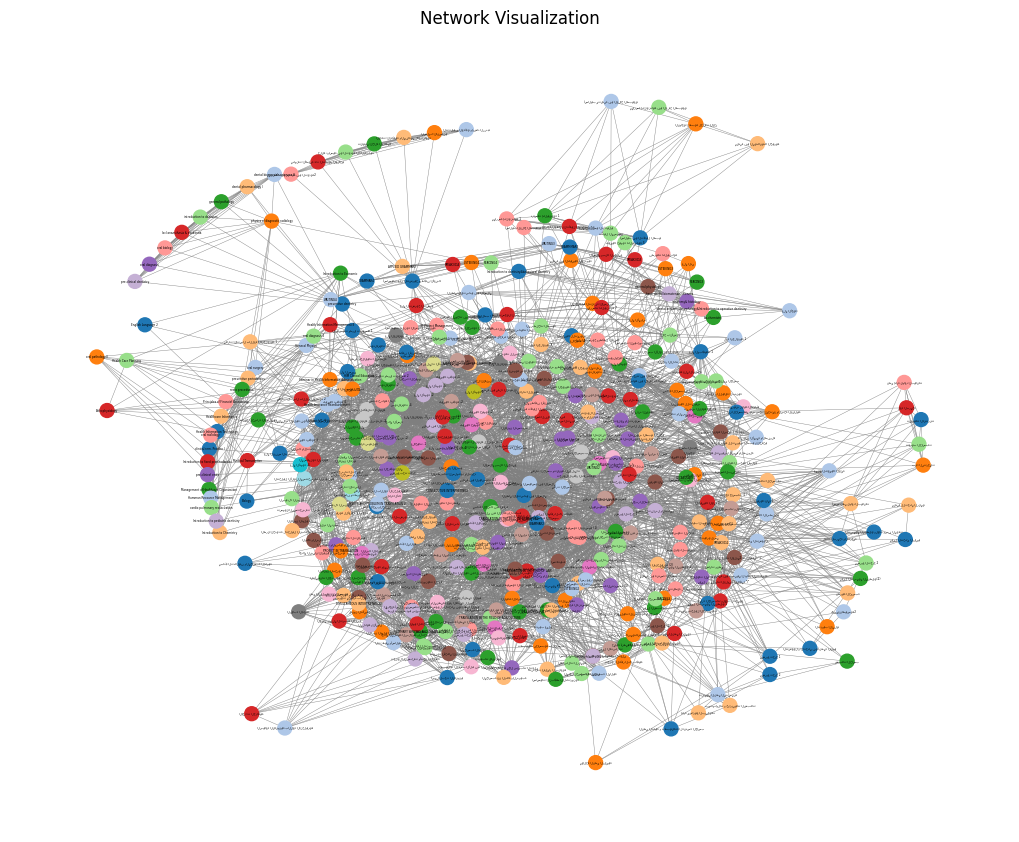

In [13]:


def visualize_network(graph):
    if not graph.nodes:
        print("The graph is empty, cannot visualize.")
        return
    
    # Generate a list of distinct colors (you can use more if needed)
    tab20_colors = plt.cm.tab20.colors  # This gives a tuple of RGB colors

    # Map color index from coloring to actual RGB values
    node_colors = [tab20_colors[coloring[node] % len(tab20_colors)] for node in G.nodes()]


    plt.figure(figsize=(10, 8))  # Increase figure size
    pos = nx.kamada_kawai_layout(graph)  # Try a different layout
    nx.draw(graph, pos, with_labels=True , node_size=100, node_color=node_colors,
            font_size=2, font_color='black', width=0.3, edge_color='gray')
    plt.title("Network Visualization")
    plt.show()

if __name__ == "__main__":
   

    visualize_network(G)

Degree of each course

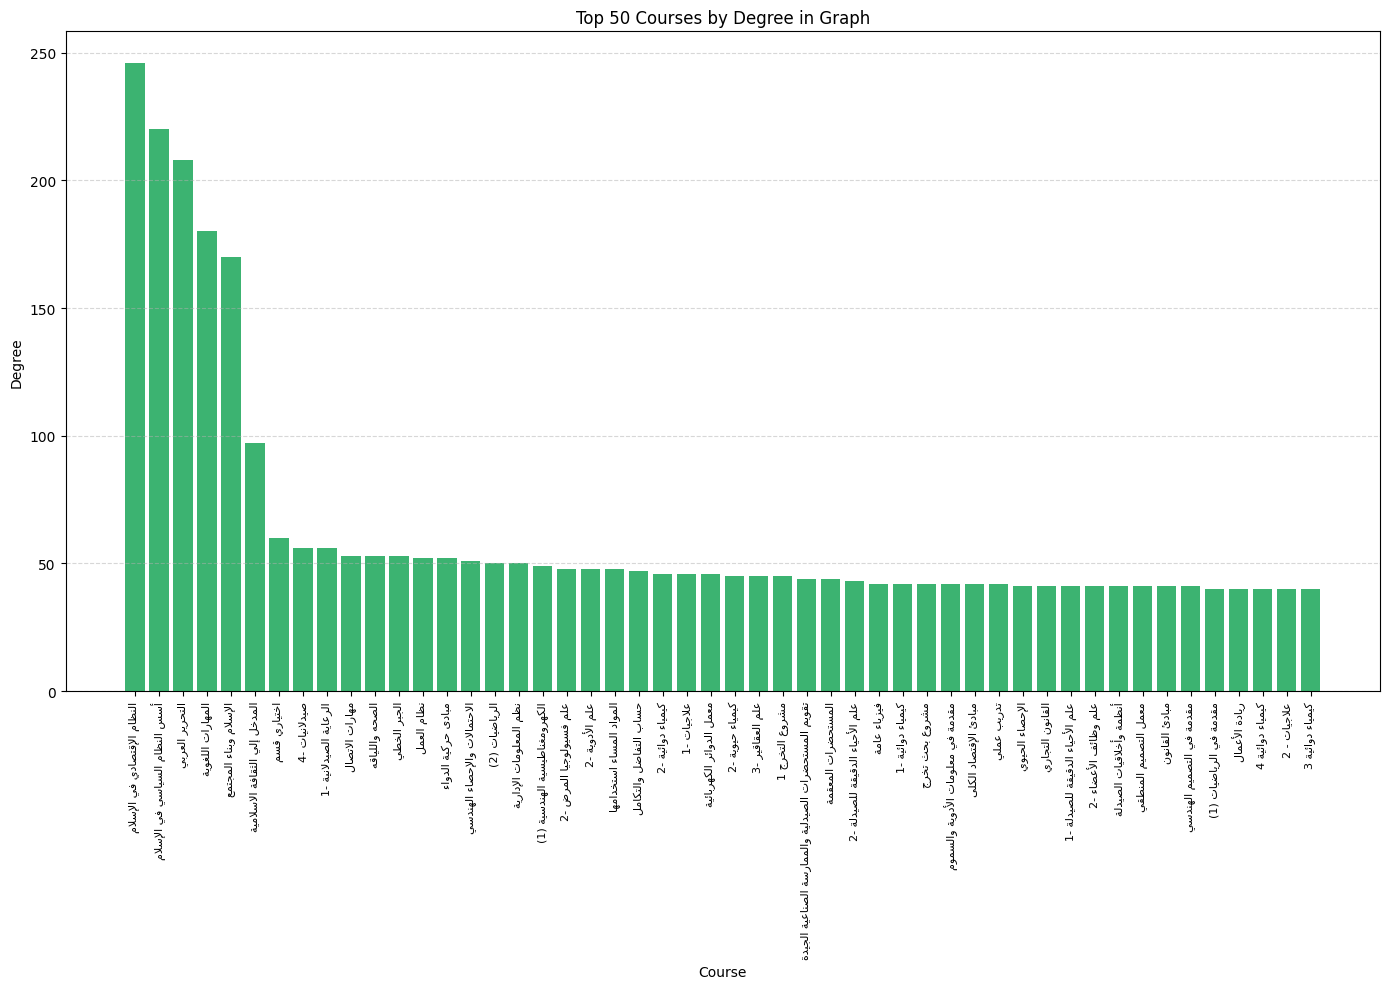

In [14]:

# Get degree of each course
degrees = dict(G.degree())

# Sort by degree descending
sorted_courses = sorted(degrees, key=degrees.get, reverse=True)

# Take top 50
top_50_courses = sorted_courses[:50]
top_50_degrees = [degrees[course] for course in top_50_courses]

top_50_courses_display = [get_display(arabic_reshaper.reshape(name)) for name in top_50_courses]

# Plot only the top 50
plt.figure(figsize=(14, 10))
plt.bar(top_50_courses_display, top_50_degrees, color='mediumseagreen')
plt.title('Top 50 Courses by Degree in Graph')
plt.xlabel('Course')
plt.ylabel('Degree')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Saving Time Table Schedule  

In [15]:

# # Define days and periods
# days = ["اليوم 1", "اليوم 2", "اليوم 3", "اليوم 4", "اليوم 5", "اليوم 6", "اليوم 7"]
# periods = [
#     ("رقم 1", "الفترة الأولى صباحية"),
#     ("رقم 2", "الفترة الثانية صباحية"),
#     ("رقم 3", "الفترة الأولى مسائية"),
#     ("رقم 4", "الفترة الثانية مسائية")
# ]

# # Generate 28 time blocks
# time_blocks = []
# for day in days:
#     for period_code, period_name in periods:
#         time_blocks.append((day, period_code, period_name))

# # Map slots to time blocks
# slot_to_timeblock = {slot: time_blocks[slot] for slot in range(max(coloring.values()) + 1)}

# # Map each course to its day and period
# course_to_timeblock = {
#     course: slot_to_timeblock[slot]
#     for course, slot in coloring.items()
# }

# # Assign Day and Period info to each row in merged_df
# merged_df['Day'] = merged_df['اسم المقرر'].map(lambda c: course_to_timeblock.get(c, (None, None, None))[0])
# merged_df['Period Code'] = merged_df['اسم المقرر'].map(lambda c: course_to_timeblock.get(c, (None, None, None))[1])
# merged_df['Period Name'] = merged_df['اسم المقرر'].map(lambda c: course_to_timeblock.get(c, (None, None, None))[2])

# # Group by exam slots and count students
# grouped = merged_df.groupby(['Day', 'Period Code', 'Period Name', 'اسم المقرر']).size().reset_index(name='عدد الطلاب')

# # Sort by day and period
# grouped = grouped.sort_values(by=['Day', 'Period Code'])

# # ✅ Create Excel-style structured layout
# excel_data = []

# for (day, period_code, period_name), group in grouped.groupby(['Day', 'Period Code', 'Period Name']):
#     # Section title
#     excel_data.append([f"{day}", ""])
#     excel_data.append(["", f"{period_name} ({period_code})"])
#     excel_data.append(["رمز المقرر", "اسم المقرر", "عدد الطلاب"])

#     for _, row in group.iterrows():
#         # Get course code (رمز المقرر) from merged_df
#         course_code = merged_df[merged_df['اسم المقرر'] == row['اسم المقرر']]['رمز المقرر'].iloc[0]
#         excel_data.append([course_code, row['اسم المقرر'], row['عدد الطلاب']])
    
#     excel_data.append(["", "", ""])  # Blank row for spacing

# # Convert to DataFrame and save
# df_excel = pd.DataFrame(excel_data)

# df_excel.to_excel(r"C:\Users\Malak Elsayed\OneDrive\Desktop\finalll_schedule.xlsx", index=False, header=False)




In [38]:
from py2neo import Graph, Node



# ✅ Connect to Neo4j
graph_db = Graph("bolt://localhost:7687", auth=("neo4j", "malak123"))

# Clear existing data (optional)
graph_db.run("MATCH (n) DETACH DELETE n")

# Add course nodes with color
for course in G.nodes():
    node = Node("Course", name=course, color=coloring[course])
    graph_db.merge(node, "Course", "name")

# Add edges based on conflicts
for u, v in G.edges():
    graph_db.run("""
        MATCH (a:Course {name: $u}), (b:Course {name: $v})
        MERGE (a)-[:CONFLICTS_WITH]->(b)
    """, u=u, v=v)

print("✅ Graph successfully uploaded to Neo4j!")


✅ Graph successfully uploaded to Neo4j!
